The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. <br>
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.<br>



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.<br>



Attribute Information:<br>

The explanations of sensor measurements and their brief statistics are given below.<br>

Variable (Abbr.) Unit Min Max Mean<br>
Ambient temperature (AT) C“6.23 37.10 17.71<br>
Ambient pressure (AP) mbar 985.85 1036.56 1013.07<br>
Ambient humidity (AH) (%) 24.08 100.20 77.87<br>
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93<br>
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56<br>
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43<br>
Turbine after temperature (TAT) C 511.04 550.61 546.16<br>
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06<br>
Turbine energy yield (TEY) MWH 100.02 179.50 133.51<br>
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37<br>
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [3]:
gas_turbines = pd.read_csv('gas_turbines.csv')

In [4]:
gas_turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
gas_turbines.shape

(15039, 11)

In [6]:
gas_turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
gas_turbines[gas_turbines.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [8]:
gas_turbines.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
gas_turbines.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


# Visualisation

<AxesSubplot:>

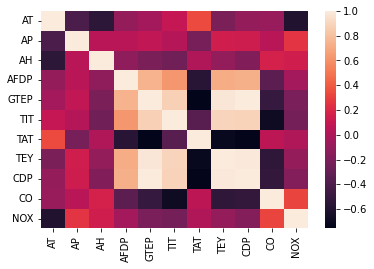

In [10]:
corr = gas_turbines.corr()
sns.heatmap(corr)

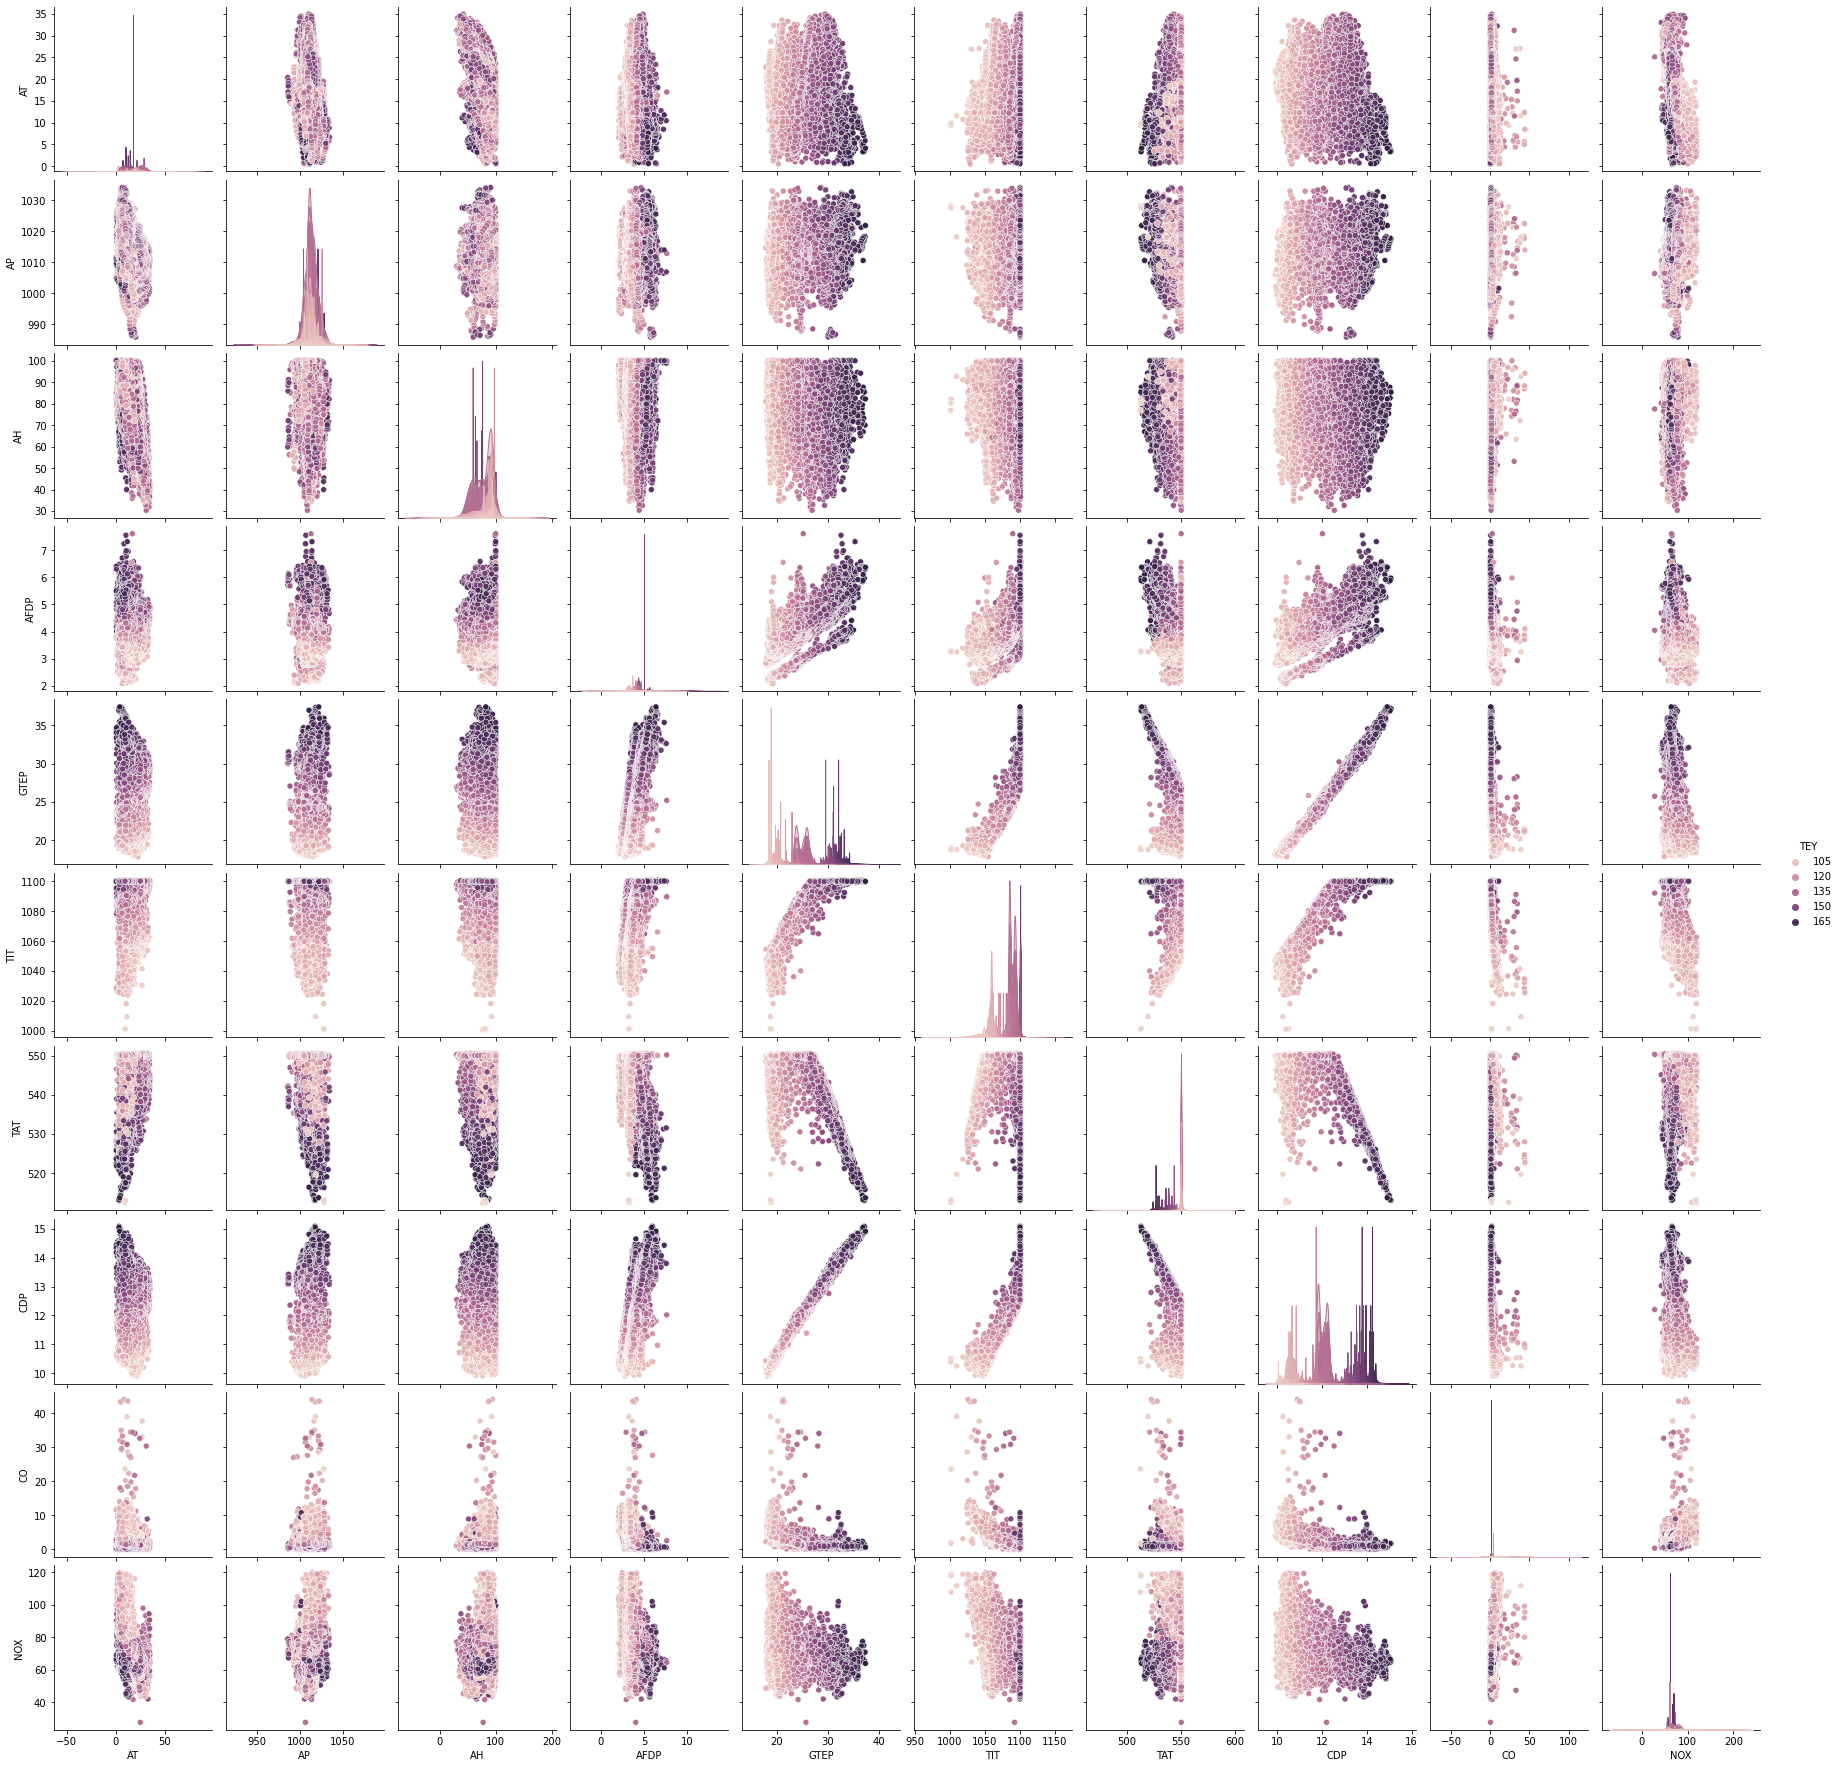

In [12]:
sns.pairplot(gas_turbines,hue='TEY')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


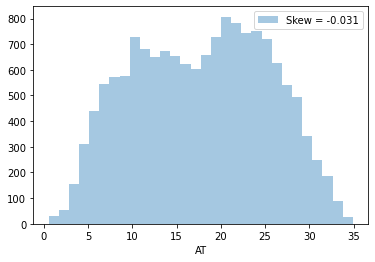

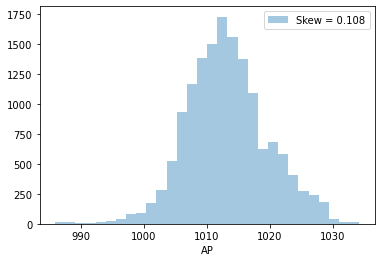

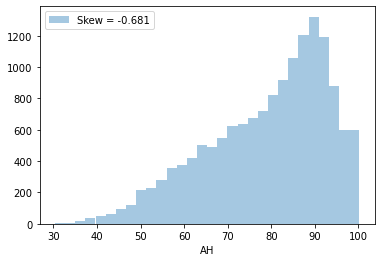

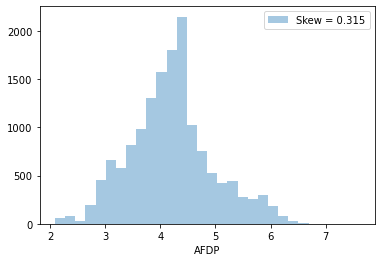

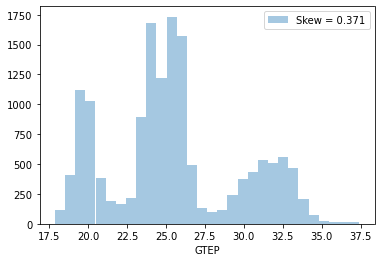

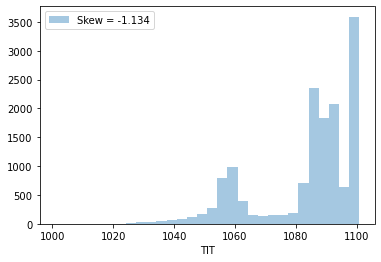

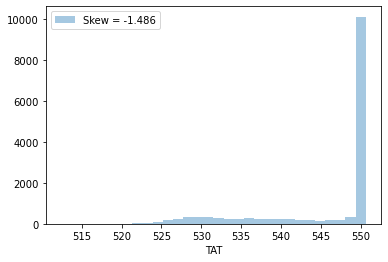

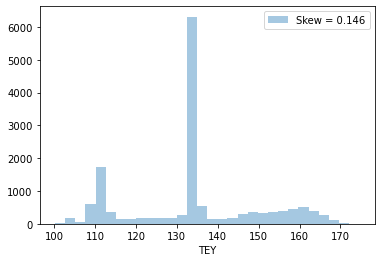

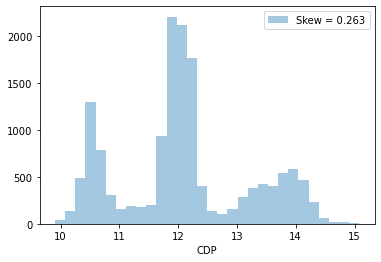

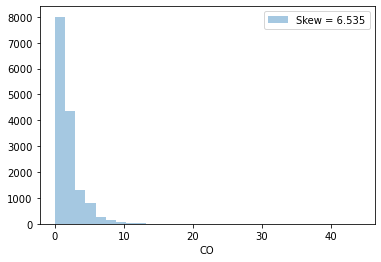

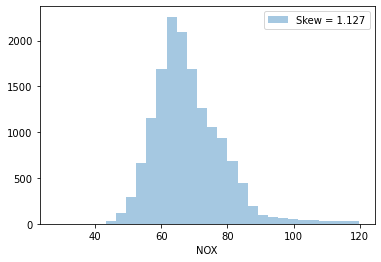

In [11]:
numerical_features=[feature for feature in gas_turbines.columns if gas_turbines[feature].dtypes != 'O']
for feat in numerical_features:
    skew = gas_turbines[feat].skew()
    sns.distplot(gas_turbines[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

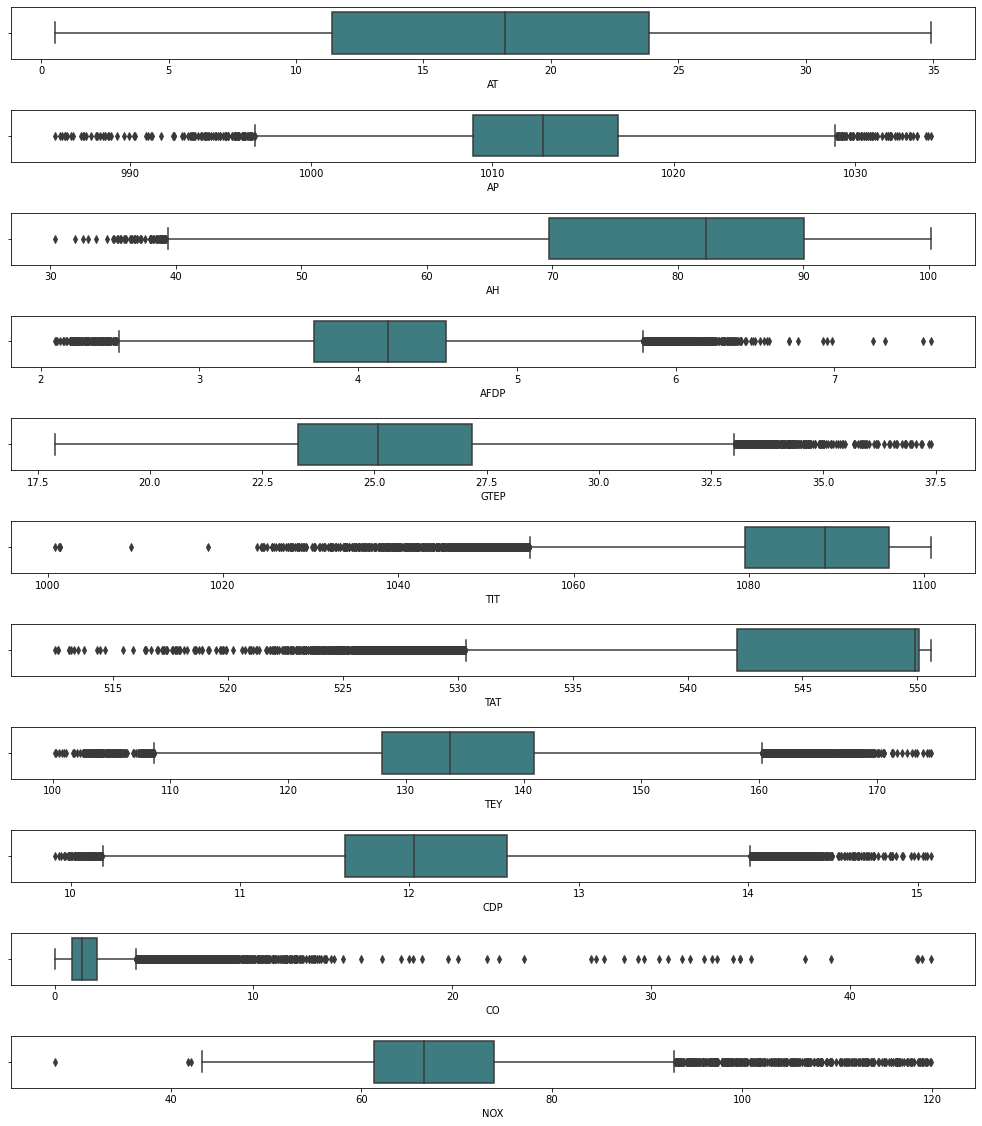

In [12]:
ot =gas_turbines.copy() 
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

# Normalisation 

In [13]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
gas_turbines1=norm_func(gas_turbines)
gas_turbines1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [15]:
X = gas_turbines1.drop(['TEY'],axis=1)
Y = gas_turbines1.iloc[:,7]

In [16]:
X.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087


In [17]:
Y.head()

0    0.195191
1    0.195459
2    0.195325
3    0.195459
4    0.195459
Name: TEY, dtype: float64

# Feature Selection

In [18]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [19]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, Y)

In [20]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [21]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.712392,CDP
4,1.599696,GTEP
5,1.325389,TIT
6,0.896987,TAT
3,0.660442,AFDP
8,0.513089,CO
0,0.412257,AT
9,0.300954,NOX
1,0.138340,AP
2,0.097902,AH


### Dropping last 3 Features as score is very less

In [22]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV

In [23]:
model_data = gas_turbines1[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,0.135340,0.091426,0.584,0.984015,0.255758,0.071522,0.184182,0.195191
1,0.133988,0.094755,0.585,0.984015,0.255721,0.073372,0.182020,0.195459
2,0.134567,0.097367,0.586,0.980608,0.252571,0.072576,0.185295,0.195325
3,0.135533,0.098033,0.588,0.983753,0.252227,0.072375,0.189922,0.195459
4,0.136692,0.096650,0.589,0.983491,0.255323,0.073647,0.199830,0.195459


In [24]:
x = model_data.drop('TEY',axis=1)
y = model_data[['TEY']]

In [25]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)


In [26]:
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((10527, 7), (4512, 7), (10527, 1), (4512, 1))

# ANN model Building

In [27]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

# Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

#### 1. Hyperparameter Tuning:  : Batch Size and Epochs

In [28]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [33]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=7, activation='relu'))
    model.add(Dense(8  , activation='relu'))
    model.add(Dense(1  , activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='mean_absolute_error', optimizer=adam, metrics=['mean_absolute_error'])
    return model

In [34]:
# Create the model
model = KerasRegressor(build_fn = create_model,verbose = 1)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
Epoch 1/10


C:\Users\Ritesh\AppData\Local\Temp/ipykernel_11480/2250132335.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 1)


843/843 [==============================] - 2s 1ms/step - loss: 0.0242 - mean_absolute_error: 0.0242
Epoch 2/10
843/843 [==============================] - 1s 1ms/step - loss: 0.0137 - mean_absolute_error: 0.0137
Epoch 3/10
843/843 [==============================] - 1s 1ms/step - loss: 0.0119 - mean_absolute_error: 0.0119
Epoch 4/10
843/843 [==============================] - 1s 1ms/step - loss: 0.0113 - mean_absolute_error: 0.0113
Epoch 5/10
843/843 [==============================] - 1s 1ms/step - loss: 0.0115 - mean_absolute_error: 0.0115
Epoch 6/10
843/843 [==============================] - 1s 1ms/step - loss: 0.0106 - mean_absolute_error: 0.0106
Epoch 7/10
843/843 [==============================] - 1s 1ms/step - loss: 0.0100 - mean_absolute_error: 0.0100
Epoch 8/10
843/843 [==============================] - 1s 1ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 9/10
843/843 [==============================] - 1s 1ms/step - loss: 0.0097 - mean_absolute_error: 0.0097
Epoch 10/10


In [35]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.007382495794445276, using {'batch_size': 20, 'epochs': 100}
-0.012181850522756577,0.0028908248636056143 with: {'batch_size': 10, 'epochs': 10}
-0.008979531843215227,0.0018514242579093447 with: {'batch_size': 10, 'epochs': 50}
-0.008872937224805356,0.0022691128686734736 with: {'batch_size': 10, 'epochs': 100}
-0.01208360716700554,0.0026681104916312314 with: {'batch_size': 20, 'epochs': 10}
-0.008724813722074032,0.0010690882041210334 with: {'batch_size': 20, 'epochs': 50}
-0.007382495794445276,0.0005070165955113202 with: {'batch_size': 20, 'epochs': 100}
-0.010088128782808781,0.000951510107678354 with: {'batch_size': 40, 'epochs': 10}
-0.008408193476498127,0.00042291583063988424 with: {'batch_size': 40, 'epochs': 50}
-0.008331203646957875,0.0010727727216303842 with: {'batch_size': 40, 'epochs': 100}


#### 2. Tuning of Hyperparameters:- Learning rate and Drop out rate

In [37]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 7,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 7,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_absolute_error',optimizer = adam,metrics = ['mean_absolute_error'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


C:\Users\Ritesh\AppData\Local\Temp/ipykernel_11480/2806687094.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.013 total time=  42.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.009 total time=  41.1s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.012 total time=  40.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.012 total time=  41.4s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.010 total time=  42.5s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 

In [38]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.01106528304517269, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.01106528304517269,0.0013857992416383862 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.04184190146625042,0.05407211230537903 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.14988855719566346,0.002602274250546323 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.0244619220495224,0.005054024721832064 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.10809990242123604,0.0479361283746434 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.09471091739833355,0.05149910958114921 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.04016956351697445,0.013369570888485184 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.05099748112261295,0.020326657196806014 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.1297033578157425,0.04041252549375951 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


#### 3.Tuning of Hyperparameters:- Activation Function and Kernel Initializer 

In [39]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 7,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(4,input_dim = 7,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'mean_absolute_error',optimizer = adam,metrics = ['mean_absolute_error'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)



C:\Users\Ritesh\AppData\Local\Temp/ipykernel_11480/4197631710.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.009 total time=  41.6s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.009 total time=  42.1s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.009 total time=  40.9s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.010 total time=  41.1s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.010 total time=  41.3s
[CV 1/5; 2/12] START activation_function=softmax, init=norm

In [40]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.009125851467251778, using {'activation_function': 'tanh', 'init': 'uniform'}
-0.009510895796120166,0.00022706955716306521 with: {'activation_function': 'softmax', 'init': 'uniform'}
-0.009426694363355637,0.00013399142450225187 with: {'activation_function': 'softmax', 'init': 'normal'}
-0.14824289381504058,0.0022074689931268093 with: {'activation_function': 'softmax', 'init': 'zero'}
-0.009390047751367092,0.0008201918488640005 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.06495694424957037,0.06679744280835276 with: {'activation_function': 'relu', 'init': 'normal'}
-0.1482392132282257,0.0022447888334542615 with: {'activation_function': 'relu', 'init': 'zero'}
-0.009125851467251778,0.00037977154227560804 with: {'activation_function': 'tanh', 'init': 'uniform'}
-0.009300705790519715,0.0016233203226005944 with: {'activation_function': 'tanh', 'init': 'normal'}
-0.14822873175144197,0.0022324986939629113 with: {'activation_function': 'tanh', 'init': 'zero'}
-0.01193031

#### 4. Tuning of Hyperparameter :-Number of Neurons in activation layer

In [41]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 7,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'mean_absolute_error',optimizer = adam,metrics = ['mean_absolute_error'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

C:\Users\Ritesh\AppData\Local\Temp/ipykernel_11480/3328244377.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.009 total time=  44.3s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.009 total time=  44.9s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.009 total time=  42.3s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.009 total time=  41.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END ........neuron1=4, neuron2=2;, score=-0.009 total time=  41.5s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ........neuron1=4, neuron2=4;, 

In [42]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.008406767807900905, using {'neuron1': 16, 'neuron2': 4}
-0.009104218892753124,0.00025733724640361963 with: {'neuron1': 4, 'neuron2': 2}
-0.009182075224816798,0.00036096312246024036 with: {'neuron1': 4, 'neuron2': 4}
-0.00940353199839592,0.00023510078603649023 with: {'neuron1': 4, 'neuron2': 8}
-0.009339933842420578,0.0005847752518096189 with: {'neuron1': 8, 'neuron2': 2}
-0.009230165742337704,0.0006101729337734161 with: {'neuron1': 8, 'neuron2': 4}
-0.011908125691115856,0.0020434959712100024 with: {'neuron1': 8, 'neuron2': 8}
-0.008655022829771042,0.0003934071425092449 with: {'neuron1': 16, 'neuron2': 2}
-0.008406767807900905,0.00030912701215731234 with: {'neuron1': 16, 'neuron2': 4}
-0.009420335106551648,0.0005107045425032652 with: {'neuron1': 16, 'neuron2': 8}


#### Training model with optimum values of Hyperparameters

In [62]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 7,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(4,input_dim = 7,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'mean_absolute_error',optimizer = adam,metrics = ['mean_absolute_error'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 10,batch_size = 20,epochs = 100)

# Fitting the model

model.fit(x_train,y_train)

# Predicting using trained model

y_predict = model.predict(x_test)



Epoch 1/100


C:\Users\Ritesh\AppData\Local\Temp/ipykernel_11480/194517636.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 10,batch_size = 20,epochs = 100)


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

In [64]:
y_predict

array([0.8461289 , 0.44607475, 0.8438894 , ..., 0.15622394, 0.13345109,
       0.44964325], dtype=float32)

In [70]:
y_test.shape, y_predict.shape

((4512, 1), (4512,))

In [73]:
#converting y_test to array
y_test1 = y_test.values

In [74]:
MAPE = np.mean(100 * (np.abs(y_test1-y_predict)/y_test1)) 

In [80]:
print('Model accuracy' ,round(MAPE, 3),'%')

Model accuracy 86.043 %
